In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load and Visualize data

In [23]:
X=pd.read_csv("Training Data/Linear_X_Train.csv")
y=pd.read_csv("Training Data/Linear_Y_Train.csv")

In [24]:
X= X.values
y= y.values


u=X.mean()
std=X.std()


X=(X-u)/std


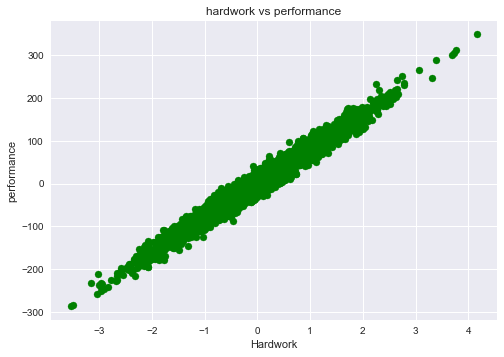

In [31]:
plt.style.use('seaborn')
plt.scatter(X,y,color='green')
plt.title("hardwork vs performance")
plt.xlabel("Hardwork")
plt.ylabel("performance")
plt.show()

In [10]:
X.shape

(3750, 1)

In [11]:
y.shape

(3750, 1)

# Linear Regression Algorithm

In [43]:
def hypothesis(x,theta):
    y_=theta[0]+theta[1]*x
    return y_

def gradient(X,Y,theta):
    m=X.shape[0]
    grad=np.zeros((2,))
    for i in range(m):
        x=X[i]
        y_=hypothesis(x,theta)
        y=Y[i]
        grad[0]+= (y_ - y)
        grad[1]+= (y_ - y)*x        
        
    return grad/m    

def error(X,Y,theta):
    total_error = 0.0
    m=X.shape[0]
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        total_error+= (y_ - Y[i])**2

    return total_error/m

def gradientDescent(X,Y,max_steps=100,rate=0.1):
    
    theta=np.zeros((2,))
    error_list=[]
    
    for i in range(max_steps):
        grad=gradient(X,Y,theta)
        
        e= error(X,Y,theta)
        error_list.append(e)
        
        theta[0] = theta[0] - rate * grad[0]
        theta[1] = theta[1] - rate * grad[1]        
        
    return (theta,error_list)

In [44]:
theta,error_list = gradientDescent(X,y)

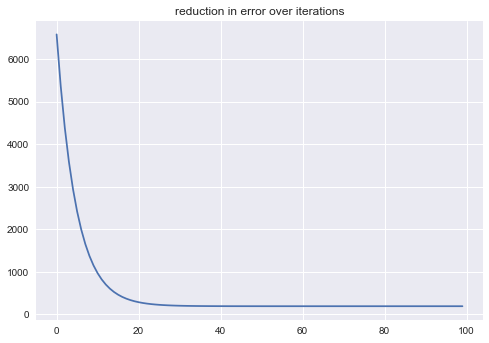

In [46]:
plt.plot(error_list)
plt.title("reduction in error over iterations")
plt.show()

# Predictions and best fit

In [47]:
y_= hypothesis(X,theta)
print(y_)

[[-19.5733619 ]
 [-43.69571729]
 [ 86.4848761 ]
 ...
 [-20.85044708]
 [138.70197319]
 [-35.87897262]]


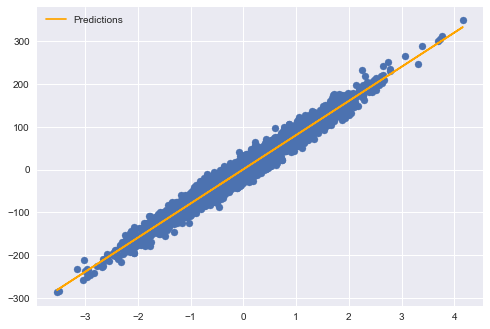

In [55]:
plt.scatter(X,y)
plt.plot(X,y_,color='orange',label='Predictions')
plt.legend()
plt.show()

In [70]:
X_test=pd.read_csv('Test Cases/Linear_X_Test.csv').values
y_test = hypothesis(X_test,theta)



In [71]:
df = pd.DataFrame(data=y_test,columns = ['y'])
print(df)
print(X_test)

               y
0    -149.370696
1     -68.754940
2    -201.486870
3     221.234243
4      47.906897
...          ...
1245  -12.744630
1246   75.171802
1247   10.912138
1248  -21.532358
1249  -53.684600

[1250 rows x 1 columns]
[[-1.87794441]
 [-0.86903192]
 [-2.53018242]
 ...
 [ 0.12800782]
 [-0.27803759]
 [-0.68042543]]


In [72]:
df.to_csv("y_predictions2.csv",index=False)